# CRISP-DM

<span style="font-size: 16px;">
Proses pembangunan sistem rekomendasi menggunakan kerangka kerja CRISP-DM. Kerangka kerja CRISP-DM memberikan gambaran tentang siklus hidup proyek data mining. CRISP-DM memiliki 6 tahapan yaitu Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, dan Deployment seperti ditunjukkan pada gambar di bawah
</span>&nbsp;

<img src="Gambar/CRISP-DM.png" width="400"/>&nbsp;

<span style="font-size: 16px;">
Dalam note book ini akan dijelaskan implementasi setiap langkah-langkah dari CRISP-DM dalam pembuatan sistem rekomendasi untuk menentukan posisi pemain sepakbola terbaik terkecuali tahapan business understanding
</span>&nbsp;

### Data Understanding

<span style="font-size: 16px;">
Tahap pemahaman data dimulai dengan pengumpulan data awal dan dilanjutkan dengan aktivitas yang memungkinkan untuk mengenal data, mengidentifikasi masalah kualitas data, menemukan informasi tentang data, dan / atau mendeteksi subset yang menarik untuk membentuk hipotesis mengenai informasi tersembunyi.
</span>&nbsp;

**Pengumpulan Data Awal**

Tahap pengumpulan data dilakukan dengan memuat data pemain yang awalnya dalam bentuk CSV menjadi bentuk sebuah dataframe dan memilih fitur yang akan digunakan dalam pembuatan model. Fitur tersebut adalah 
1. Acceleration 
2. Sprint 
3. Positioning 
3. Finishing 
4. Shot Power 
5. Long Shots 
6. Volleys 
7. Penalties 
8. Vision 
9. Crossing 
10. Free Kick Accuracy 
11. Short Passing 
12. Long Passing
13. Curve
14. Agility 
15. Balance 
16. Reactions 
17. Ball Control
18. Dribbling 
19. Composure 
20. Interceptions 
21. Heading Accuracy 
22. Defensive Awareness 
23. Standing Tackle 
24. Sliding Tackle
25. Jumping 
26. Stamina 
27. Strength 
28. Aggression.

28 fitur yang telah disebutkan merupakan fitur pilihan yang telah dilakukan oleh domain expert

In [1]:
import pandas as pd 

#Memuat dataset yang dibutuhkan 
df = pd.read_csv(r'C:\Users\hello\anaconda3\envs\tensorflow\male_players (legacy).csv\male_players (legacy).csv')

<ipython-input-1-03702453633c>:4: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\hello\anaconda3\envs\tensorflow\male_players (legacy).csv\male_players (legacy).csv')


In [2]:
#Memilih data terbaru dengan menggunakan versi Fifa 2023
df = df[df['fifa_version'] == 23]

#Memilih fitur yang dibutuhkan dari dataset yang sudah dimuat
selected_columns = df[['rwb', 'lwb', 'rb', 'lb', 'cb', 'cdm', 'lm', 'rm', 'lw', 'rw', 'cf', 'st', 
                      'movement_sprint_speed', 'movement_acceleration', 'mentality_positioning',
                      'mentality_interceptions', 'mentality_aggression','attacking_finishing',
                      'power_shot_power', 'power_long_shots', 'attacking_volleys',
                      'mentality_penalties', 'mentality_vision', 'attacking_crossing',
                      'skill_fk_accuracy', 'attacking_short_passing', 'skill_long_passing',
                      'skill_curve', 'movement_agility', 'movement_balance',
                      'movement_reactions', 'skill_ball_control', 'skill_dribbling',
                      'mentality_composure', 'attacking_heading_accuracy', 'defending_marking_awareness',
                      'defending_standing_tackle', 'defending_sliding_tackle', 'power_jumping',
                      'power_stamina', 'power_strength', 'long_name']]

selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18533 entries, 143050 to 161582
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rwb                          18533 non-null  object 
 1   lwb                          18533 non-null  object 
 2   rb                           18533 non-null  object 
 3   lb                           18533 non-null  object 
 4   cb                           18533 non-null  object 
 5   cdm                          18533 non-null  object 
 6   lm                           18533 non-null  object 
 7   rm                           18533 non-null  object 
 8   lw                           18533 non-null  object 
 9   rw                           18533 non-null  object 
 10  cf                           18533 non-null  object 
 11  st                           18533 non-null  object 
 12  movement_sprint_speed        18533 non-null  int64  
 13  movement_accele

Di atas merupakan semua fitur beserta variabel targetnya yang digunakan dalam pembuatan model sistem rekomendasi. Variabel long_name dipilih untuk memberikan informasi mengenai nama pemain agar lebih mudah dikenali.

In [3]:
#Pemisahan variabel posisi pemain ke dalam variabel player_position
player_position = selected_columns[['rwb', 'lwb', 'rb', 'lb', 'cb', 'cdm', 'lm', 'rm', 'lw', 'rw', 'cf', 'st']]

In [4]:
#Pemisahan variabel atribut pemain ke dalam variabel player_attributes
player_attributes = selected_columns[['movement_sprint_speed', 'movement_acceleration', 'mentality_positioning',
                      'mentality_interceptions', 'mentality_aggression','attacking_finishing',
                      'power_shot_power', 'power_long_shots', 'attacking_volleys',
                      'mentality_penalties', 'mentality_vision', 'attacking_crossing',
                      'skill_fk_accuracy', 'attacking_short_passing', 'skill_long_passing',
                      'skill_curve', 'movement_agility', 'movement_balance',
                      'movement_reactions', 'skill_ball_control', 'skill_dribbling',
                      'mentality_composure', 'attacking_heading_accuracy', 'defending_marking_awareness',
                      'defending_standing_tackle', 'defending_sliding_tackle', 'power_jumping',
                      'power_stamina', 'power_strength']]

**Pengujian Kualitas dan Validitas Data**

Dalam buku ["Business Research Methods"](https://www.lspr.edu/wp-content/uploads/2022/05/Donald-R-Cooper-Pamela-S-Schindler-Business-Research-Methods.pdf) oleh Cooper dan Schindler, validitas data didefinisikan sebagai pengukuran yang menunjukkan bahwa variabel yang diukur sebenarnya adalah variabel yang akan diteliti oleh para peneliti.

Pengujian kualitas dan validitas data yang akan dilakukan adalah:
1. Pengecekan nilai null atau NaN
2. Pengecekan tipe data dan konsistensinya
3. Pengecekan rentang dan batasan nilai data
4. Pengecekan outliers

In [5]:
#Pengecekan nilai Null atau NaN pada variabel posisi pemain
player_position.isna().sum()

#Pengecekan nilai Null atau NaN pada variabel atribut pemain
player_attributes.isna().sum()

movement_sprint_speed          0
movement_acceleration          0
mentality_positioning          0
mentality_interceptions        0
mentality_aggression           0
attacking_finishing            0
power_shot_power               0
power_long_shots               0
attacking_volleys              0
mentality_penalties            0
mentality_vision               0
attacking_crossing             0
skill_fk_accuracy              0
attacking_short_passing        0
skill_long_passing             0
skill_curve                    0
movement_agility               0
movement_balance               0
movement_reactions             0
skill_ball_control             0
skill_dribbling                0
mentality_composure            0
attacking_heading_accuracy     0
defending_marking_awareness    0
defending_standing_tackle      0
defending_sliding_tackle       0
power_jumping                  0
power_stamina                  0
power_strength                 0
dtype: int64

Pengecekan nilai Null atau NaN pada kedua variabel posisi dan atribut pemain menunjukkan bahwa data tidak memiliki nilai kosong

In [6]:
#Pengecekan tipe data variabel posisi pemain
player_position.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18533 entries, 143050 to 161582
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rwb     18533 non-null  object
 1   lwb     18533 non-null  object
 2   rb      18533 non-null  object
 3   lb      18533 non-null  object
 4   cb      18533 non-null  object
 5   cdm     18533 non-null  object
 6   lm      18533 non-null  object
 7   rm      18533 non-null  object
 8   lw      18533 non-null  object
 9   rw      18533 non-null  object
 10  cf      18533 non-null  object
 11  st      18533 non-null  object
dtypes: object(12)
memory usage: 1.8+ MB


Terlihat dari hasil kode di atas bahwa tipe data variabel posisi pemain masih dalam bentuk "object", sedangkan seharusnya tipe variabel tersebut merupakan integer karena variabel posisi pemain merupakan angka hasil pengukuran seberapa baik pemain tersebut bermain di posisi yang bersangkutan. Maka dapat disimpulkan bahwa perlu adanya pengolahan data berupa pengubahan dari tipe object menjadi tipe yang sesuai, yaitu integer

In [7]:
#Pengecekan konsistensi tipe data variabel posisi pemain
def check_data_type_consistency(dataframe):
    inconsistent_columns = []

    for column in dataframe.columns:
        unique_data_types = dataframe[column].apply(type).unique()

        if len(unique_data_types) > 1:
            inconsistent_columns.append(column)

    if inconsistent_columns:
        print("Inkonsistensi data ditemukan pada kolom berikut:")
        print(inconsistent_columns)
    else:
        print("Tipe data konsisten untuk semua kolom.")

check_data_type_consistency(player_position)

Tipe data konsisten untuk semua kolom.


Hasil dari pengecekan konsistensi data menunjukkan bahwa semua data memiliki tipe data yang konsisten di semua kolom untuk data variabel posisi pemain, sehingga tidak diperlukan tindakan tambahan pada saat preparasi data

In [8]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18533 entries, 143050 to 161582
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   movement_sprint_speed        18533 non-null  int64  
 1   movement_acceleration        18533 non-null  int64  
 2   mentality_positioning        18533 non-null  int64  
 3   mentality_interceptions      18533 non-null  int64  
 4   mentality_aggression         18533 non-null  int64  
 5   attacking_finishing          18533 non-null  int64  
 6   power_shot_power             18533 non-null  int64  
 7   power_long_shots             18533 non-null  int64  
 8   attacking_volleys            18533 non-null  int64  
 9   mentality_penalties          18533 non-null  int64  
 10  mentality_vision             18533 non-null  int64  
 11  attacking_crossing           18533 non-null  int64  
 12  skill_fk_accuracy            18533 non-null  int64  
 13  attacking_short

Hasil di atas menunjukkan bahwa kolom composure memiliki tipe data yang tidak sesuai dikarenakan data seharusnya dalam bentuk integer seperti pada kolom lainnya. Maka dari itu diperlukan tahapan untuk mengubah tipe data yang tidak sesuai menjadi sesuai pada tahap preparasi data

In [9]:
check_data_type_consistency(player_attributes)

Tipe data konsisten untuk semua kolom.


Hasil pengecekan konsistensi tipe data menunjukkan bahwa tipe data konsisten untuk semua kolom yang ada pada data variabel atribut pemain, sehingga tidak diperlukan tindakan tambahan pada preparasi data nanti

Pengecekan outliers digunakan berdasarkan tahapan yang diproposalkan pada sumber [paper](https://arxiv.org/ftp/arxiv/papers/1406/1406.5074.pdf)

In [10]:
#Pengecekan outliers menggunakan z-scores berdasarkan sumber
def detect_and_display_outliers(features_df):
    
    z_scores_df = pd.DataFrame()

    
    for column in features_df.columns:
        z_scores_df[column] = (features_df[column] - features_df[column].mean()) / features_df[column].std()

    
    for column in features_df.columns:
        threshold = 2.5 if len(features_df) <= 80 else 3.0
        outliers = abs(z_scores_df[column]) > threshold
        percentage_outliers = (outliers.sum() / len(features_df)) * 100

        # Display results for each column
        print(f"\nKolom: {column}")
        print(f"Persentase Outlier: {percentage_outliers:.2f}%")
    
detect_and_display_outliers(player_attributes)


Kolom: movement_sprint_speed
Persentase Outlier: 0.70%

Kolom: movement_acceleration
Persentase Outlier: 0.67%

Kolom: mentality_positioning
Persentase Outlier: 0.00%

Kolom: mentality_interceptions
Persentase Outlier: 0.00%

Kolom: mentality_aggression
Persentase Outlier: 0.00%

Kolom: attacking_finishing
Persentase Outlier: 0.00%

Kolom: power_shot_power
Persentase Outlier: 0.01%

Kolom: power_long_shots
Persentase Outlier: 0.00%

Kolom: attacking_volleys
Persentase Outlier: 0.00%

Kolom: mentality_penalties
Persentase Outlier: 0.00%

Kolom: mentality_vision
Persentase Outlier: 0.09%

Kolom: attacking_crossing
Persentase Outlier: 0.00%

Kolom: skill_fk_accuracy
Persentase Outlier: 0.00%

Kolom: attacking_short_passing
Persentase Outlier: 0.65%

Kolom: skill_long_passing
Persentase Outlier: 0.01%

Kolom: skill_curve
Persentase Outlier: 0.00%

Kolom: movement_agility
Persentase Outlier: 0.01%

Kolom: movement_balance
Persentase Outlier: 0.08%

Kolom: movement_reactions
Persentase Outl

Dari pengecekan outliers menggunakan z-scores menurut dengan batasan menurut sumber, ditemukan bahwa outliers tidak lebih dari 1% dari tiap data dalam masing-masing kolom. Keputusan penghapusan outliers dilakukan dengan uji coba klasterisasi K-Means, jikalau hasil dari klasterisasi K-Means dengan data tanpa outliers lebih baik, maka dilakukan dilakukan penghapusan outliers

In [11]:
from sklearn.cluster import KMeans
import numpy as np

def check_and_remove_outliers(dataframe):
    
    original_df = dataframe.copy()

   
    threshold = 2.5 if len(original_df) < 80 else 3.0
    outliers_mask = pd.DataFrame()
    
    for column in original_df.columns:
        z_scores_column = (original_df[column] - original_df[column].mean()) / original_df[column].std()
        outliers_mask[column] = abs(z_scores_column) > threshold
    
    dataframe_no_outliers = original_df[~outliers_mask.any(axis=1)]

    #Dipilih 12 klaster sebagai uji coba sesuai dengan jumlah posisi pemain yang tersedia
    kmeans = KMeans(n_clusters=12, random_state=42, n_init=5, max_iter=100)

    kmeans.fit(original_df)
    original_distances = kmeans.transform(original_df).min(axis=1)

    kmeans.fit(dataframe_no_outliers)
    no_outliers_distances = kmeans.transform(dataframe_no_outliers).min(axis=1)

    sum_distances_original = np.sum(original_distances)
    sum_distances_no_outliers = np.sum(no_outliers_distances)

    if sum_distances_no_outliers < sum_distances_original:
        print("Outliers sebaiknya dihilangkan")
    else:
        print("Outliers tidak perlu dihilangkan")
        
check_and_remove_outliers(player_attributes)

Outliers sebaiknya dihilangkan


Dari hasil uji coba klasterisasi menggunakan K-Means menunjukkan bahwa outliers sebaiknya dihilangkan dikarenakan hasil klasterisasi K-Means lebih baik tanpa outliers dibandingkan dengan outliers. Hasil ini berarti akan ditambahkan tahap penghilangan outliers pada tahap persiapan data (data preparation)

**Analisis Univariat**

Metode analisis data yang digunakan untuk menganalisis suatu variabel atau data tunggal. Pada metode ini, variabel tersebut dihitung dan dianalisis secara terpisah untuk menghasilkan gambaran yang lebih jelas mengenai variabel tersebut. Analisis tersebut dapat berupa ukuran statistik, tabel, dan atau grafik.

Menurut [sumber](https://www.analytixlabs.co.in/blog/univariate-analysis/#Univariate_Statistics), analisis univariat dilakukan dengan mengukur ukuran pemusatan data (central tendency), variabilitas atau dispersi, dan bentuk distribusi dari masing-masing variabel

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

In [13]:
#Memperlihatkan ukuran pemusatan data

def central_tendency_measures(dataframe):
    # Menghitung Mean, Median, dan Mode
    central_tendency_data = []

    for column in dataframe.columns:
        mean_value = dataframe[column].mean()
        median_value = dataframe[column].median()
        mode_values = mode(dataframe[column], keepdims=True).mode.tolist()

        central_tendency_data.append({
            'Column': column,
            'Mean': mean_value,
            'Median': median_value,
            'Mode': mode_values
        })

    # Menampilkan statistik dalam bentuk tabular
    central_tendency_df = pd.DataFrame(central_tendency_data)

    return central_tendency_df

central_tendency_measures(player_attributes)

,Column,Mean,Median,Mode
0,movement_sprint_speed,64.769870,68.0,[68]
1,movement_acceleration,64.673339,68.0,[68]
2,mentality_positioning,50.514919,56.0,[60]
3,mentality_interceptions,46.793719,54.0,[62]
4,mentality_aggression,55.637997,58.0,[55]
5,attacking_finishing,46.250040,50.0,[55]
6,power_shot_power,57.824259,59.0,[65]
7,power_long_shots,46.823396,51.0,[58]
8,attacking_volleys,42.534884,44.0,[55]
9,mentality_penalties,48.002968,49.0,[55]


Dari hasil pengukuran ukuran pemusatan data dapat dinyatakan bahwa kebanyakan atribut pemain memiliki distribusi dengan kemiringan negatif atau kebanyakan data berada dalam sisi kanan dalam sebuah distribusi. Hal tersebut konsisten terhadap semua kolom terkecuali kolom fk accuracy (akurasi freekick) dimana distribusi memiliki kemiringan positif dan distribusi data mayoritas berada pada sisi bagian kiri. Berdasarkan hal tersebut, dapat diasumsikan bahwa akurasi free kick merupakan skill pemain yang paling jarang dikuasai dibandingkan dengan yang lainnya.

In [14]:
#Pengecekan variabilitas pada data
def variability_measures(dataframe):
    # Calculate variability measures for each column
    variability_data = []

    for column in dataframe.columns:
        range_value = dataframe[column].max() - dataframe[column].min()
        iqr_value = dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25)
        variance_value = dataframe[column].var()
        std_deviation_value = dataframe[column].std()

        variability_data.append({
            'Column': column,
            'Range': range_value,
            'Interquartile Range (IQR)': iqr_value,
            'Variance': variance_value,
            'Standard Deviation': std_deviation_value
        })

    # Create a DataFrame to store the results
    variability_df = pd.DataFrame(variability_data)

    return variability_df

variability_measures(player_attributes)

,Column,Range,Interquartile Range (IQR),Variance,Standard Deviation
0,movement_sprint_speed,82.0,18.0,227.838846,15.094332
1,movement_acceleration,83.0,18.0,232.974444,15.263500
2,mentality_positioning,94.0,24.0,386.632264,19.662967
3,mentality_interceptions,88.0,38.0,426.632117,20.655075
4,mentality_aggression,85.0,23.0,285.963864,16.910466
5,attacking_finishing,91.0,31.0,385.337002,19.630003
6,power_shot_power,76.0,20.0,168.202817,12.969303
7,power_long_shots,87.0,30.0,375.182440,19.369627
8,attacking_volleys,87.0,26.0,311.834594,17.658839
9,mentality_penalties,86.0,21.0,248.142070,15.752526


Berdasarkan pengukuran dispersi atau variabilitas, data yang digunakan memiliki variabilitas yang cukup rendah atau tidak tinggi mengingat standar deviasi lebih kecil dan cukup jauh dari nilai mean. Pada beberapa skill pemain terlihat standar deviasi yang berbeda, yaitu interceptions, awareness, standing tackle, sliding tackle, dan reactions. Kebanyakan data memiliki standar deviasi dalam belasan, sedangkan interceptions, awareness, standing tackle, dan sliding tackle dalam besaran puluhan. Hal tersebut dapat berarti bahwa kemampuan pemain pada skill tersebut lebih bervariasi dibandingkan yang lainnya, sedangkan pada skill reactions, memiliki standar deviasi dalam satuan yang dapat menunjukkan bahwa pemain kurang lebih memiliki kemampuan yang sama pada skill tersebut

In [15]:
def shape_measures(dataframe):
    # Calculate shape measures for each column
    shape_data = []

    for column in dataframe.columns:
        skewness_value = skew(dataframe[column])
        kurtosis_value = kurtosis(dataframe[column])

        # Determine skewness direction
        skewness_direction = 'Symmetrical'
        if skewness_value < 0:
            skewness_direction = 'Left-skewed'
        elif skewness_value > 0:
            skewness_direction = 'Right-skewed'

        # Determine symmetry
        symmetry = 'Symmetrical' if abs(skewness_value) < 0.5 else 'Not Symmetrical'

        shape_data.append({
            'Column': column,
            'Skewness': skewness_value,
            'Skewness Direction': skewness_direction,
            'Kurtosis': kurtosis_value,
            'Symmetry': symmetry
        })

    # Create a DataFrame to store the results
    shape_df = pd.DataFrame(shape_data)

    return shape_df

shape_measures(player_attributes)

,Column,Skewness,Skewness Direction,Kurtosis,Symmetry
0,movement_sprint_speed,-0.940792,Left-skewed,0.676206,Not Symmetrical
1,movement_acceleration,-0.941262,Left-skewed,0.653683,Not Symmetrical
2,mentality_positioning,-0.849706,Left-skewed,-0.162560,Not Symmetrical
3,mentality_interceptions,-0.369470,Left-skewed,-1.207448,Symmetrical
4,mentality_aggression,-0.489960,Left-skewed,-0.509574,Symmetrical
5,attacking_finishing,-0.412973,Left-skewed,-0.826055,Symmetrical
6,power_shot_power,-0.240444,Left-skewed,-0.467793,Symmetrical
7,power_long_shots,-0.489572,Left-skewed,-0.732844,Symmetrical
8,attacking_volleys,-0.211831,Left-skewed,-0.612659,Symmetrical
9,mentality_penalties,-0.386513,Left-skewed,-0.233563,Symmetrical


Hasil tersebut menunjukkan bahwa semua data berdistribusi miring kiri dimana mayoritas data terletak pada sebelah kanan distribusi. Data simetri menunjukkan bahwa walaupun data tidak berdistribusi normal ekor dari distribusi cenderung tidak panjang, sedangkan data asimetri, menunjukkan bahwa distribusi memiliki ekor yang cukup panjang, oleh karena itu data asimetri dapat diartikan bahwa distribusi sangat jauh dari asumsi distribusi normal. Atribut pemain yang memiliki distribusi asimetri adalah sprint, acceleration, positioning, crossing, short passing, long passing, agility, balance, control, dribbling, heading, dan stamina.

## Multivariate Analysis

Menurut buku statistik berjudul [statistik multivariat](https://publikasi.ubl.ac.id/index.php/Monograf/catalog/book/55), analisis multivariat merupakan metode statistik yang memungkinkan melakukan penelitian terhadap satu atau lebih dari dua variabel secara bersamaan. Tujuan utama dari statistik dan multivariat adalah untuk mengukur derajat, menjelaskan, menguji, dan memprediksi perbedaan atau hubungan beberapa variabel terhadap variabel lainnya dalam waktu yang bersamaan.

Ada beberapa tahap asumsi klasik yang harus dilaksanakan agar model regresi tidak bias, beberapa tahapan tersebut adalah:

1. Uji normalitas data
2. Uji multikolinearitas data
3. Uji homoskedastisitas data

Karena uji normalitas data sudah dilakukan pada tahap analisis univariat maka dilakukan uji multikolinearitas dan homoskedastisitas pada data

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Uji multikolinearitas menggunakan VIF
def calculate_vif(dataframe):

    vif_data = pd.DataFrame()

    vif_data["Variable"] = dataframe.columns

    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]

    return vif_data

calculate_vif(player_attributes)

,Variable,VIF
0,movement_sprint_speed,146.616042
1,movement_acceleration,186.336336
2,mentality_positioning,90.867182
3,mentality_interceptions,94.101593
4,mentality_aggression,47.349556
5,attacking_finishing,93.846920
6,power_shot_power,85.804612
7,power_long_shots,84.465550
8,attacking_volleys,52.228076
9,mentality_penalties,58.952121


Terlihat dari hasil di atas bahwa semua atribut pemain memiliki korelasi yang sangat tinggi. VIF di atas 10 menandakan korelasi sangat tinggi yang tidak dapat ditolerir untuk kasus pemodelan regresi ([sumber](https://link.springer.com/book/10.1007/978-1-4614-7138-7)), sehingga diperlukan tahapan seleksi data untuk menurunkan derajat multikolinearitas

### Pengubahan Variabel Dependen dari Object ke Integer

Dikarenakan variabel dependen masih berbentuk objek, maka harus diubah ke bentuk integer terlebih dahulu sebelum dilakukan test homoskedastisitas.

In [17]:
#Investigasi bentuk awal variabel dependen
player_position

,rwb,lwb,rb,lb,cb,cdm,lm,rm,lw,rw,cf,st
143050,64+3,64+3,59+3,59+3,50+3,63+3,89+2,89+2,90,90,91,87+3
143051,64+3,64+3,60+3,60+3,55+3,64+3,86+3,86+3,87,87,89,89+2
143052,64+3,64+3,61+3,61+3,60+3,66+3,83+3,83+3,85,85,88,89+2
143053,79+3,79+3,75+3,75+3,69+3,79+3,88+3,88+3,88,88,87,83+3
143054,67+3,67+3,63+3,63+3,54+3,63+3,89+3,89+3,90,90,90,89+3
...,...,...,...,...,...,...,...,...,...,...,...,...
161578,37+2,37+2,36+2,36+2,31+2,32+2,46+2,46+2,46,46,46,47+2
161579,43+2,43+2,44+2,44+2,48+2,41+2,35+2,35+2,34,34,33,35+2
161580,47+2,47+2,47+2,47+2,46+2,45+2,47+2,47+2,46,46,46,46+2
161581,34+2,34+2,32+2,32+2,28+2,30+2,44+2,44+2,46,46,46,47+2


Terlihat bahwa bentuk awal variabel dependen adalah String, sehingga dalam dataframe diakui sebagai tipe data object. Pengubahan variabel ke dalam integer dapat dilakukan dengan regex

In [18]:
#Pengubahan Variabel Dependen dari Object ke Integer
def convert_strings_to_integers(dataframe):

    def convert_string_to_int(value):
        if '-' in value:
            parts = value.split('-')
            return int(parts[0]) - int(parts[1])
        else:
            parts = value.split('+')
            return int(parts[0])

    return dataframe.applymap(convert_string_to_int)

player_position_transformed = convert_strings_to_integers(player_position)

player_position_transformed

,rwb,lwb,rb,lb,cb,cdm,lm,rm,lw,rw,cf,st
143050,64,64,59,59,50,63,89,89,90,90,91,87
143051,64,64,60,60,55,64,86,86,87,87,89,89
143052,64,64,61,61,60,66,83,83,85,85,88,89
143053,79,79,75,75,69,79,88,88,88,88,87,83
143054,67,67,63,63,54,63,89,89,90,90,90,89
...,...,...,...,...,...,...,...,...,...,...,...,...
161578,37,37,36,36,31,32,46,46,46,46,46,47
161579,43,43,44,44,48,41,35,35,34,34,33,35
161580,47,47,47,47,46,45,47,47,46,46,46,46
161581,34,34,32,32,28,30,44,44,46,46,46,47


In [19]:
player_position_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18533 entries, 143050 to 161582
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rwb     18533 non-null  int64
 1   lwb     18533 non-null  int64
 2   rb      18533 non-null  int64
 3   lb      18533 non-null  int64
 4   cb      18533 non-null  int64
 5   cdm     18533 non-null  int64
 6   lm      18533 non-null  int64
 7   rm      18533 non-null  int64
 8   lw      18533 non-null  int64
 9   rw      18533 non-null  int64
 10  cf      18533 non-null  int64
 11  st      18533 non-null  int64
dtypes: int64(12)
memory usage: 1.8 MB


Dari hasil di atas, sudah dapat dipastikan bahwa variabel dependen dalam bentuk integer

In [20]:
#Uji homoskedastisitas menggunakan Breusch-Pagan's test

def breusch_pagan_test(X_df, y_df, threshold=0.05):
    results = {}

    for column in y_df.columns:
        # Extract the target variable
        y = y_df[column]

        # Add a constant term to the input data
        X_with_const = sm.add_constant(X_df)

        # Fit the OLS model
        model = sm.OLS(y, X_with_const).fit()

        # Perform the Breusch-Pagan test
        _, p_value, _, _ = het_breuschpagan(model.resid, X_with_const)
        
        # Determine significance based on the threshold
        is_homogeneous = p_value < threshold

        results[column] = {'p_value': p_value, 'homogeneous': is_homogeneous}

    return results

# Example usage:
# Assuming 'player_attributes' is your feature DataFrame and 'player_position_transformed' is your target DataFrame
results = breusch_pagan_test(player_attributes, player_position_transformed)

# Print results
for column, result in results.items():
    print(f"Breusch-Pagan test for {column}:")
    print(f"  p-value: {result['p_value']}")
    print(f"  Features are homogeneous: {result['homogeneous']}")
    print()

Breusch-Pagan test for rwb:
  p-value: 1.5489517355468064e-07
  Features are homogeneous: True

Breusch-Pagan test for lwb:
  p-value: 1.5489517355468064e-07
  Features are homogeneous: True

Breusch-Pagan test for rb:
  p-value: 6.740221549517118e-06
  Features are homogeneous: True

Breusch-Pagan test for lb:
  p-value: 6.740221549517118e-06
  Features are homogeneous: True

Breusch-Pagan test for cb:
  p-value: 8.014208346778667e-20
  Features are homogeneous: True

Breusch-Pagan test for cdm:
  p-value: 1.5944267116318396e-35
  Features are homogeneous: True

Breusch-Pagan test for lm:
  p-value: 2.430527706643553e-31
  Features are homogeneous: True

Breusch-Pagan test for rm:
  p-value: 2.430527706643553e-31
  Features are homogeneous: True

Breusch-Pagan test for lw:
  p-value: 8.113561537446759e-41
  Features are homogeneous: True

Breusch-Pagan test for rw:
  p-value: 8.113561537446759e-41
  Features are homogeneous: True

Breusch-Pagan test for cf:
  p-value: 7.41372228534715

Berdasarkan uji homoskedastisitas menggunakan Breusch-Pagan, variabel independen dan variabel dependen bersifat homoskedastis

# Data Preparation

Secara garis besar data preparation dilakukan untuk memperbaiki masalah dalam data, kemudian membuat variabel turunan. Tahap ini mengusahakan data tepat untuk algoritma yang digunakan dalam kasus ini regresi. Masalah-masalah yang ditemukan pada tahap sebelum preparasi data (data preparation) akan diselesaikan pada tahap ini. Masalah-masalah tersebut antara lain:

1. Pengubahan variabel independen composure dalam bentuk integer
2. Menghilangkan outliers pada data
3. Seleksi fitur untuk menurunkan derajat multikolinearitas pada data 

Dari hasil di atas, sudah dapat dipastikan bahwa variabel dependen dalam bentuk integer

### Pengubahan Variabel Independen Composure dalam Bentuk Integer

In [21]:
#Pengubahan Variabel Composure dalam bentuk integer
player_attributes['mentality_composure'] = player_attributes['mentality_composure'].astype(int)

player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18533 entries, 143050 to 161582
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   movement_sprint_speed        18533 non-null  int64
 1   movement_acceleration        18533 non-null  int64
 2   mentality_positioning        18533 non-null  int64
 3   mentality_interceptions      18533 non-null  int64
 4   mentality_aggression         18533 non-null  int64
 5   attacking_finishing          18533 non-null  int64
 6   power_shot_power             18533 non-null  int64
 7   power_long_shots             18533 non-null  int64
 8   attacking_volleys            18533 non-null  int64
 9   mentality_penalties          18533 non-null  int64
 10  mentality_vision             18533 non-null  int64
 11  attacking_crossing           18533 non-null  int64
 12  skill_fk_accuracy            18533 non-null  int64
 13  attacking_short_passing      18533 non-null  

<ipython-input-21-02018629662f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_attributes['mentality_composure'] = player_attributes['mentality_composure'].astype(int)


### Menghilangkan Outliers pada Data

In [22]:
#Menghilangkan outliers pada data menggunakan z-score dengan threshold 3.0 (ukuran sampel lebih dari 80)

from scipy.stats import zscore

def remove_outliers(dataframe):

    z_scores = dataframe.apply(zscore)

    outliers_mask = (z_scores.abs() > 3.0)

    dataframe_no_outliers = dataframe[~outliers_mask.any(axis=1)]

    return dataframe_no_outliers

player_attributes = remove_outliers(player_attributes)

player_attributes

,movement_sprint_speed,movement_acceleration,mentality_positioning,mentality_interceptions,mentality_aggression,attacking_finishing,power_shot_power,power_long_shots,attacking_volleys,mentality_penalties,...,skill_ball_control,skill_dribbling,mentality_composure,attacking_heading_accuracy,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,power_jumping,power_stamina,power_strength
143056,60,54,12,30,29,13,68,16,11,47,...,46,30,70,25,17,10,11,77,43,80
143057,52,42,13,15,23,14,56,17,12,27,...,23,13,66,13,20,18,16,68,38,70
143060,86,88,86,37,63,83,79,81,86,91,...,94,95,93,63,35,32,29,62,79,52
143062,66,60,75,88,91,64,88,81,62,66,...,78,67,84,79,87,88,87,85,90,90
143063,58,43,11,21,34,11,59,12,13,11,...,30,12,68,15,27,12,18,77,41,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,60,67,40,21,26,49,64,31,43,54,...,45,47,40,36,23,21,25,41,42,52
161579,56,54,31,46,46,19,33,25,25,31,...,32,30,35,42,50,51,45,56,53,64
161580,64,66,53,43,51,30,51,32,37,37,...,35,49,35,47,36,45,50,52,53,53
161581,52,59,45,16,27,56,42,47,37,63,...,43,44,43,45,19,17,14,67,59,36


Hasil di atas merupakan atribut pemain tanpa outliers. Terlihat bahwa terdapat 445 outliers sebelumnya karena terdapat 18533 baris pada data awal dan 18088 baris setelah outliers dihilangkan 

In [23]:
#Menyesuaikan variabel dependen dengan independen setelah outliers dihilangkan
player_position_transformed = player_position_transformed[player_position_transformed.index.isin(player_attributes.index)]

player_position_transformed

,rwb,lwb,rb,lb,cb,cdm,lm,rm,lw,rw,cf,st
143056,37,37,35,35,34,43,44,44,40,40,43,40
143057,29,29,29,29,29,31,31,31,29,29,31,31
143060,66,66,61,61,50,63,88,88,88,88,88,82
143062,80,80,81,81,86,86,73,73,71,71,75,75
143063,32,32,32,32,33,37,34,34,32,32,35,33
...,...,...,...,...,...,...,...,...,...,...,...,...
161578,37,37,36,36,31,32,46,46,46,46,46,47
161579,43,43,44,44,48,41,35,35,34,34,33,35
161580,47,47,47,47,46,45,47,47,46,46,46,46
161581,34,34,32,32,28,30,44,44,46,46,46,47


### Seleksi Fitur untuk Menurunkan Derajat Multikolinearitas pada Data

Pada studi kasus ini, seleksi fitur dilakukan secara 2 tahap, yaitu tahap uji signifikansi dan reduksi dimensi. Uji signifikansi dilakukan dengan Spearman Rank Correlation dan reduksi dimensi dilakukan dengan PCA. Uji signifikansi dilakukan untuk memperoleh variabel yang signifikan terhadap variabel dependen secara statistik. Spearman Rank Correlation Coefficient dipilih sebagai metode uji signifikansi karena lebih robust daripada metode Spearman Correlation tradisional ([sumber](https://www.sciencedirect.com/science/article/abs/pii/S0098300411002251)). Reduksi dimensi dilakukan untuk mereduksi variabel-variabel asli menjadi variabel turunan yang independen antar satu sama lain. Metode reduksi dimensi PCA dipilih karena keberhasilannya dalam mengatasi permasalahan asumsi multikolinearitas ([sumber](https://ojs3.unpatti.ac.id/index.php/parameter/article/view/8027))

In [24]:
#Uji signifikansi dengan spearman rank correlation coefficient
from scipy.stats import spearmanr

#Digunakan batas P-Value sebesar 0.01 untuk memilih variabel yang benar-benar signifikan terhadap variabel dependen
def test_correlation(independent_vars, dependent_vars, significance_threshold=0.01):
    
    significant_vars_dict = {}

    for dependent_column in dependent_vars.columns:
        
        dependent_variable = dependent_vars[dependent_column]

        
        significant_vars = []

        for independent_column in independent_vars.columns:
            
            independent_variable = independent_vars[independent_column]

            
            correlation_coefficient, p_value = spearmanr(independent_variable, dependent_variable)

            
            if p_value < significance_threshold:
                significant_vars.append(independent_column)

        significant_vars_dict[dependent_column] = significant_vars

    return significant_vars_dict

significant_vars_result = test_correlation(player_attributes, player_position_transformed)

In [25]:
#Pengelompokan variabel dependen berdasarkan variabel independen yang signifikan terhadapnya untuk interpretabilitas
def group_dependent_variables(significant_vars_result):
    
    grouped_dependents = {}

    for dep_var, sig_indeps in significant_vars_result.items():
        sig_indeps_tuple = tuple(sig_indeps)

        if sig_indeps_tuple in grouped_dependents:

            grouped_dependents[sig_indeps_tuple].append(dep_var)
        else:
            grouped_dependents[sig_indeps_tuple] = [dep_var]

    return grouped_dependents

group_dependent_variables(significant_vars_result)

{('movement_sprint_speed',
  'movement_acceleration',
  'mentality_positioning',
  'mentality_interceptions',
  'mentality_aggression',
  'attacking_finishing',
  'power_shot_power',
  'power_long_shots',
  'attacking_volleys',
  'mentality_penalties',
  'mentality_vision',
  'attacking_crossing',
  'skill_fk_accuracy',
  'attacking_short_passing',
  'skill_long_passing',
  'skill_curve',
  'movement_agility',
  'movement_balance',
  'movement_reactions',
  'skill_ball_control',
  'skill_dribbling',
  'mentality_composure',
  'attacking_heading_accuracy',
  'defending_marking_awareness',
  'defending_standing_tackle',
  'defending_sliding_tackle',
  'power_jumping',
  'power_stamina',
  'power_strength'): ['rwb', 'lwb', 'rb', 'lb', 'cdm', 'lw', 'rw', 'st'],
 ('movement_sprint_speed',
  'mentality_positioning',
  'mentality_interceptions',
  'mentality_aggression',
  'attacking_finishing',
  'power_shot_power',
  'power_long_shots',
  'attacking_volleys',
  'mentality_penalties',
  'men

Berdasarkan hasil test signifikansi dan pengelompokan terdapat 3 kelompok. Kelompok pertama beranggotakan 'rwb', 'lwb', 'rb', 'lb', 'cdm', 'lw', 'rw', 'st', kelompok kedua 'cb', dan terakhir kelompok ketiga 'lm', 'rm', 'cf'. Nantinya akan dibentuk 3 model regresi untuk masing-masing kelompok. Tahap selanjutnya adalah melakukan reduksi dimensi untuk masing-masing kelompok

In [26]:
#Pengelompokan data sebelum reduksi dimensi
first_group = [
  'movement_sprint_speed', 'movement_acceleration', 'mentality_positioning', 'mentality_interceptions',
  'mentality_aggression', 'attacking_finishing', 'power_shot_power', 'power_long_shots',
  'attacking_volleys', 'mentality_penalties', 'mentality_vision', 'attacking_crossing',
  'skill_fk_accuracy', 'attacking_short_passing', 'skill_long_passing', 'skill_curve',
  'movement_agility', 'movement_balance','movement_reactions','skill_ball_control',
  'skill_dribbling', 'mentality_composure', 'attacking_heading_accuracy', 'defending_marking_awareness',
  'defending_standing_tackle', 'defending_sliding_tackle', 'power_jumping', 'power_stamina', 'power_strength'
]

second_group = [
    'movement_sprint_speed', 'mentality_positioning', 'mentality_interceptions', 'mentality_aggression',
    'attacking_finishing', 'power_shot_power', 'power_long_shots', 'attacking_volleys',
    'mentality_penalties', 'mentality_vision', 'attacking_crossing', 'skill_fk_accuracy',
    'attacking_short_passing', 'skill_long_passing', 'skill_curve',
    'movement_agility', 'movement_balance', 'movement_reactions',
    'skill_ball_control', 'skill_dribbling', 'mentality_composure',
    'attacking_heading_accuracy', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle',
    'power_jumping', 'power_stamina', 'power_strength'
]

third_group = [
    'movement_sprint_speed', 'movement_acceleration', 'mentality_positioning',
    'mentality_interceptions', 'mentality_aggression', 'attacking_finishing',
    'power_shot_power', 'power_long_shots', 'attacking_volleys', 'mentality_penalties',
    'mentality_vision', 'attacking_crossing', 'skill_fk_accuracy', 'attacking_short_passing',
    'skill_long_passing', 'skill_curve', 'movement_agility', 'movement_balance',
    'movement_reactions', 'skill_ball_control', 'skill_dribbling', 'mentality_composure',
    'attacking_heading_accuracy', 'defending_marking_awareness', 'defending_standing_tackle',
    'defending_sliding_tackle', 'power_jumping', 'power_stamina'
]

In [27]:
#Reduksi dimensi dengan PCA untuk penanganan asumsi multikolinearitas 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kneed import KneeLocator

def pca_scree_plot(dataframe):

    pca = PCA()
    pca.fit(dataframe)

    # Scree plot with explained variance
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = explained_variance_ratio.cumsum()

    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
    plt.title('Scree Plot with Explained Variance')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()

    # Use the kneed library to find the elbow point
    kneedle = KneeLocator(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 
                          curve='concave', direction='increasing')
    elbow_point = kneedle.elbow

    print(f"\nJumlah komponen pada titik siku: {elbow_point}")

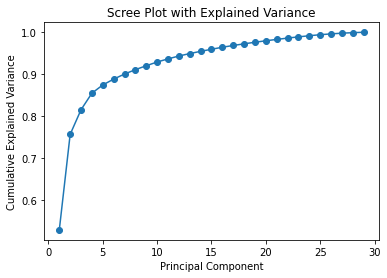


Jumlah komponen pada titik siku: 5


In [28]:
#Penentuan jumlah reduksi komponen pada kelompok pertama
pca_scree_plot(player_attributes[first_group])

Pada kelompok pertama, titik siku pada scree plot PCA adalah 5. Berdasarkan hal tersebut kelompok pertama akan direduksi menjadi 5 buah komponen utama

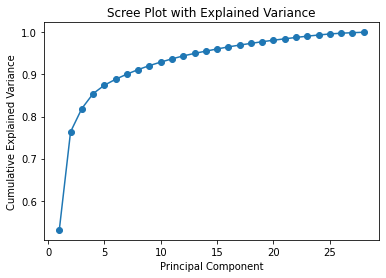


Jumlah komponen pada titik siku: 5


In [29]:
#Penentuan jumlah reduksi komponen pada kelompok kedua
pca_scree_plot(player_attributes[second_group])

Sama dengan kelompok pertama, kelompok kedua juga akan direduksi menjadi 5 komponen utama

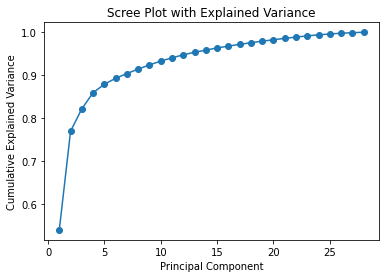


Jumlah komponen pada titik siku: 5


In [30]:
#Penentuan jumlah reduksi komponen pada kelompok ketiga
pca_scree_plot(player_attributes[third_group])

Sama dengan kelompok pertama dan kedua, kelompok ketiga akan direduksi menjadi 5 komponen utama

# Modelling

Pada tahap ini dilakukan metode statistika dan Machine Learning untuk penentuan terhadap teknik data mining, alat bantu data mining, dan algoritma data mining yang akan diterapkan. Dalam kasus ini, digunakan machine learning dengan tipe regresi.

Berdasarkan tahapan data understanding, dapat dipahami dan disimpulkan bahwa data memiliki distribusi tidak normal. Distribusi tidak normal berarti model regresi linear tidak dapat dipilih. Menurut [sumber](https://www.utstat.toronto.edu/~brunner/books/LinearModelsInStatistics.pdf) berikut, regresi linear memiliki beberapa asumsi yang perlu dipenuhi, yaitu terdapat signifikansi antara variabel independen dan dependen, asumsi homoskedastisitas, asumsi multikolinearitas, dan asumsi normalitas. Berdasarkan semua tahapan sebelum modelling, asumsi normalitas tidak terpenuhi karena data berdistribusi tidak normal.

Akibat salah satu asumsi model regresi linear tidak dapat terpenuhi, maka alternatif yang dapat digunakan adalah model regresi nonparametrik. Menurut suatu [sumber](https://www.researchgate.net/publication/228018396_Nonparametric_Regression) Analisis regresi nonparametrik menelusuri ketergantungan suatu variabel dependen terhadap satu atau beberapa variabel independen tanpa menentukan terlebih dahulu fungsi yang menghubungkan prediktor tersebut. Berdasarkan [sumber](https://www.researchgate.net/publication/365422313_Robust_nonparametric_regression_review_and_practical_considerations/fulltext/6374758c37878b3e87b51664/Robust-nonparametric-regression-review-and-practical-considerations.pdf?origin=publication_detail&_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6InB1YmxpY2F0aW9uIiwicGFnZSI6InB1YmxpY2F0aW9uRG93bmxvYWQiLCJwcmV2aW91c1BhZ2UiOiJwdWJsaWNhdGlvbiJ9fQ), regresi non-parametrik terbagi menjadi 2 tipe, yaitu "tidak terstruktur" dan "semi-terstruktur". Regresi nonparametrik "tidak terstruktur" tidak memiliki batasan mengenai bentuk asumsi, contohnya adalah regresi berbasis kernel seperti Support Vector Regressor (SVR) dan Kernel Ridge Regressor. Regresi nonparametrik "semi-terstruktur" memiliki batasan asumsi yang lemah. Batasan-batasan ini umumnya menghasilkan estimator yang mungkin memiliki variabel yang lebih sedikit dibandingkan dengan estimator yang “tidak terstruktur”, sehingga memiliki kesalahan prediksi yang lebih rendah jika bias yang disebabkan oleh struktur yang ditambahkan cukup kecil, contohnya regresi berbasis "pohon" atau tree, seperti decision tree, random forest, ataupun gradient boosted tree regression.

Menurut dua sumber, yaitu [sumber pertama](https://arno.uvt.nl/show.cgi?fid=161188) dan [kedua](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9721908) yang menggunakan dataset sama, Random Forest Regression menjadi model terbaik dibandingkan dengan model lainnya, sehingga model regresi nonparametrik yang digunakan berjenis regresi "semi-tersturktur" berjenis regresi "pohon" atau tree. Model regresi "pohon" atau tree yang diujicobakan berjenis decision tree regressor dan random forest regressor. Dilakukan eksplorasi juga untuk model "semi-terstruktur" berjenis gradient boosted tree regression, dimana regresi "pohon" dikombinasikan dengan gradient boosting.

Pembagian data latih dan uji umumnya dengan ratio 70-80% untuk data latih dan 20-30% untuk data uji menurut [sumber](https://drive.google.com/file/d/1NpAvCvRZD6QMg4DDliFFE68CVSB3addY/view). Pada kasus ini digunakan 70% untuk data latih dengan pertimbangan overfitting

### Pembagian Data Latih dan Uji pada Kelompok Pertama ['rwb', 'lwb', 'rb', 'lb', 'cdm', 'lw', 'rw', 'st']

In [31]:
from sklearn.model_selection import train_test_split
X_train_first, X_test_first, y_train_first, y_test_first = train_test_split(player_attributes[first_group], 
                                                                            player_position_transformed[
                                                                                ['rwb', 'lwb', 'rb', 'lb', 
                                                                                'cdm', 'lw', 'rw', 'st']
                                                                            ], 
                                                                            test_size=0.3, random_state=42)

### Pembagian Data Latih dan Uji pada Kelompok Kedua ['cb']

In [32]:
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(player_attributes[second_group], 
                                                                            player_position_transformed['cb'], 
                                                                            test_size=0.3, random_state=42)

### Pembagian Data Latih dan Uji pada Kelompok Ketiga ['lm', 'rm', 'cf']

In [33]:
X_train_third, X_test_third, y_train_third, y_test_third = train_test_split(player_attributes[third_group], 
                                                                            player_position_transformed[['lm', 'rm', 'cf']], 
                                                                            test_size=0.3, random_state=42)

### Pemodelan pada Model Regresi "Pohon" atau Trees (Decision Tree dan Random Forest)

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import make_scorer, mean_absolute_error

In [44]:
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [97]:
pca_1 = PCA(n_components=5)

DCR_1 = DecisionTreeRegressor(random_state=42)

pipeline_dcr_1 = Pipeline([
    ('pca', pca_1),
    ('dcr', DCR_1)
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_dcr_1, X_train_first, y_train_first, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model Decision Tree pada Kelompok Pertama:", mae_scores.mean())

dc_kel_1 = pipeline_dcr_1.fit(X_train_first, y_train_first)

Mean Absolute Error Model Decision Tree pada Kelompok Pertama: 1.5506680758327087


In [113]:
pca_2 = PCA(n_components=5)

DCR_2 = DecisionTreeRegressor(random_state=42)

pipeline_dcr_2 = Pipeline([
    ('pca', pca_2),
    ('dcr', DCR_2)
])


# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_dcr_2, X_train_second, y_train_second, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model Decision Tree pada Kelompok Kedua:", mae_scores.mean())

dc_kel_2 = pipeline_dcr_2.fit(X_train_second, y_train_second)

Mean Absolute Error Model Decision Tree pada Kelompok Kedua: 1.0157964791006606


In [45]:
pca_3 = PCA(n_components=5)

DCR_3 = DecisionTreeRegressor(random_state=42)

pipeline_dcr_3 = Pipeline([
    ('pca', pca_3),
    ('dcr', DCR_3)
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_dcr_3, X_train_third, y_train_third, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model Decision Tree pada Kelompok Ketiga:", mae_scores.mean())

dc_kel_3 = pipeline_dcr_3.fit(X_train_third, y_train_third)

Mean Absolute Error Model Decision Tree pada Kelompok Ketiga: -1.9082487231056267


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
pca_1_rfr = PCA(n_components=5)

RFR_1 = RandomForestRegressor(random_state=42)

pipeline_rfr_1 = Pipeline([
    ('pca', pca_1_rfr),
    ('rfr', RFR_1)
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_rfr_1, X_train_first, y_train_first, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model Random Forest pada Kelompok Pertama:", mae_scores.mean())

rf_kel_1 = pipeline_rfr_1.fit(X_train_first, y_train_first)

Mean Absolute Error Model Random Forest pada Kelompok Pertama: 1.1076420282629122


In [120]:
pca_2_rfr = PCA(n_components=5)

RFR_2 = RandomForestRegressor(random_state=42)

pipeline_rfr_2 = Pipeline([
    ('pca', pca_2_rfr),
    ('rfr', RFR_2)
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_rfr_2, X_train_second, y_train_second, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model Random Forest pada Kelompok Kedua:", mae_scores.mean())

rf_kel_2 = pipeline_rfr_2.fit(X_train_second, y_train_second)

Mean Absolute Error Model Random Forest pada Kelompok Kedua: 0.7150795190672778


In [46]:
pca_3_rfr = PCA(n_components=5)

RFR_3 = RandomForestRegressor(random_state=42)

pipeline_rfr_3 = Pipeline([
    ('pca', pca_3_rfr),
    ('rfr', RFR_3)
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_rfr_3, X_train_third, y_train_third, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model Random Forest pada Kelompok Ketiga:", mae_scores.mean())

rf_kel_3 = pipeline_rfr_3.fit(X_train_third, y_train_third)

Mean Absolute Error Model Random Forest pada Kelompok Ketiga: -1.3956465750885372


### Pemodelan pada Model Gradient Boosted Tree Regression (XGBRegressor, AdaBoost, Histogram-based Gradient Boosting Regression Tree)

In [49]:
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor

In [50]:
xgb = XGBRegressor()

pipeline_xgb = Pipeline([
    ('pca', pca),
    ('xgb', xgb)
])

In [136]:
PCA_xgb_1 = PCA(n_components=5)

xgb_1 = XGBRegressor()

pipeline_xgb_1 = Pipeline([
    ('pca', PCA_xgb_1),
    ('xgb', xgb_1)
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_xgb_1, X_train_first, y_train_first, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model XGBoost pada Kelompok Pertama:", mae_scores.mean())

xgb_kel_1 = pipeline_xgb_1.fit(X_train_first, y_train_first)

Mean Absolute Error Model XGBoost pada Kelompok Pertama: 1.1001205059474868


In [137]:
PCA_xgb_2 = PCA(n_components=5)

xgb_2 = XGBRegressor()

pipeline_xgb_2 = Pipeline([
    ('pca', PCA_xgb_2),
    ('xgb', xgb_2)
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_xgb_2, X_train_second, y_train_second, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model XGBoost pada Kelompok Kedua:", mae_scores.mean())

xgb_kel_2 = pipeline_xgb_2.fit(X_train_second, y_train_second)

Mean Absolute Error Model XGBoost pada Kelompok Kedua: 0.7570988356786207


In [138]:
PCA_xgb_3 = PCA(n_components=5)

xgb_3 = XGBRegressor()

pipeline_xgb_3 = Pipeline([
    ('pca', PCA_xgb_3),
    ('xgb', xgb_3)
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_xgb_3, X_train_third, y_train_third, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model XGBoost pada Kelompok Ketiga:", mae_scores.mean())

xgb_kel_3 = pipeline_xgb_3.fit(X_train_third, y_train_third)

Mean Absolute Error Model XGBoost pada Kelompok Ketiga: 1.414435210495596


In [139]:
pca_adb_1 = PCA(n_components=5)

adb_1 = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6), random_state=42, n_estimators=100, loss='exponential')

pipeline_adb_1 = Pipeline([
    ('pca', pca_adb_1),
    ('adb', MultiOutputRegressor(adb_1))
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_adb_1, X_train_first, y_train_first, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model AdaBoost pada Kelompok Pertama:", mae_scores.mean())

adb_kel_1 = pipeline_adb_1.fit(X_train_first, y_train_first)

Mean Absolute Error Model AdaBoost pada Kelompok Pertama: 1.1731761801879408


In [140]:
pca_adb_2 = PCA(n_components=5)

adb_2 = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6), random_state=42, n_estimators=100, loss='exponential')

pipeline_adb_2 = Pipeline([
    ('pca', pca_adb_2),
    ('adb', adb_2)
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_adb_2, X_train_second, y_train_second, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model AdaBoost pada Kelompok Kedua:", mae_scores.mean())

adb_kel_2 = pipeline_adb_2.fit(X_train_second, y_train_second)

Mean Absolute Error Model AdaBoost pada Kelompok Kedua: 0.8757435045117076


In [141]:
pca_adb_3 = PCA(n_components=5)

adb_3 = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6), random_state=42, n_estimators=100, loss='exponential')

pipeline_adb_3 = Pipeline([
    ('pca', pca_adb_3),
    ('adb', MultiOutputRegressor(adb_3))
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_adb_3, X_train_third, y_train_third, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model AdaBoost pada Kelompok Ketiga:", mae_scores.mean())

adb_kel_3 = pipeline_adb_3.fit(X_train_third, y_train_third)

Mean Absolute Error Model AdaBoost pada Kelompok Ketiga: 1.4308668699358902


In [142]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [143]:
pca_hgb_1 = PCA(n_components=5)

hgb_1 = HistGradientBoostingRegressor(random_state=42, max_depth=6)

pipeline_hgb_1 = Pipeline([
    ('pca', pca_hgb_1),
    ('hgb', MultiOutputRegressor(hgb_1))
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_hgb_1, X_train_first, y_train_first, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model Histogram Gradient Boosting Regressor pada Kelompok Pertama:", mae_scores.mean())

hgb_kel_1 = pipeline_hgb_1.fit(X_train_first, y_train_first)

Mean Absolute Error Model Histogram Gradient Boosting Regressor pada Kelompok Pertama: 1.0444838739260425


In [172]:
pca_hgb_2 = PCA(n_components=5)

hgb_2 = HistGradientBoostingRegressor(random_state=42, max_depth=6)

pipeline_hgb_2 = Pipeline([
    ('pca', pca_hgb_2),
    ('hgb', hgb_2)
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_hgb_2, X_train_second, y_train_second, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model Histogram Gradient Boosting Regressor pada Kelompok Kedua:", mae_scores.mean())

hgb_kel_2 = pipeline_hgb_2.fit(X_train_second, y_train_second)

Mean Absolute Error Model Histogram Gradient Boosting Regressor pada Kelompok Kedua: 0.7135416520679988


In [173]:
pca_hgb_3 = PCA(n_components=5)

hgb_3 = HistGradientBoostingRegressor(random_state=42, max_depth=6)

pipeline_hgb_3 = Pipeline([
    ('pca', pca_hgb_3),
    ('hgb', MultiOutputRegressor(hgb_3))
])

# Use cross_val_score to fit the pipeline and get mean absolute error scores
mae_scores = cross_val_score(pipeline_hgb_3, X_train_third, y_train_third, cv=rkf, scoring=mae_scorer)

# Print the MAE for the training set
print("Mean Absolute Error Model Histogram Gradient Boosting Regressor pada Kelompok Ketiga:", mae_scores.mean())

hgb_kel_3 = pipeline_hgb_3.fit(X_train_third, y_train_third)

Mean Absolute Error Model Histogram Gradient Boosting Regressor pada Kelompok Ketiga: 1.3577536180644834


# Evaluation

Melakukan interpretasi terhadap hasil dari data mining yang dihasilkan dalam proses pemodelan pada tahap sebelumnya. Evaluasi dilakukan terhadap model yang diterapkan pada tahap sebelumnya dengan tujuan agar model yang ditentukan dapat sesuai dengan tujuan yang ingin dicapai dalam tahap pertama.

Metrik evaluasi yang digunakan adalah metrik utama yang ada dalam [paper](https://arxiv.org/ftp/arxiv/papers/1809/1809.03006.pdf) dan evaluasi menggunakan analisis residual. Analisis residual digunakan untuk menguji validitas model yang sudah dilatih, apabila residual terjadi secara acak maka model valid, jika tidak atau berpola maka model kurang dapat diandalkan

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Evaluasi Model Tree Regression (Decision Tree dan Random Forest) Kelompok Pertama menggunakan MAE dan RMSE

In [122]:
predict_1_dc = dc_kel_1.predict(X_test_first)
predict_1_rf = rf_kel_1.predict(X_test_first)

In [123]:
#MAE dari model kelompok pertama
mae_1_dc = mean_absolute_error(y_test_first, np.round(predict_1_dc))
mae_1_rf = mean_absolute_error(y_test_first, np.round(predict_1_rf))
print(f"Mean Absolute Error Decision Tree Kelompok Pertama: {mae_1_dc}")
print(f"Mean Absolute Error Random Forest Kelompok Pertama: {mae_1_rf}")

Mean Absolute Error Decision Tree Kelompok Pertama: 1.5256817763036667
Mean Absolute Error Random Forest Kelompok Pertama: 1.0772756587433205


In [124]:
#RMSE dari model kelompok pertama
rmse_1_dc = mean_squared_error(y_test_first, np.round(predict_1_dc), squared=False)
rmse_1_rf = mean_squared_error(y_test_first, np.round(predict_1_rf), squared=False)
print(f"Root Mean Squared Error Decision Tree Kelompok Pertama: {rmse_1_dc}")
print(f"Root Mean Squared Error Random Forest Kelompok Pertama: {rmse_1_rf}")

Root Mean Squared Error Decision Tree Kelompok Pertama: 1.9987402081538876
Root Mean Squared Error Random Forest Kelompok Pertama: 1.4383839096276245


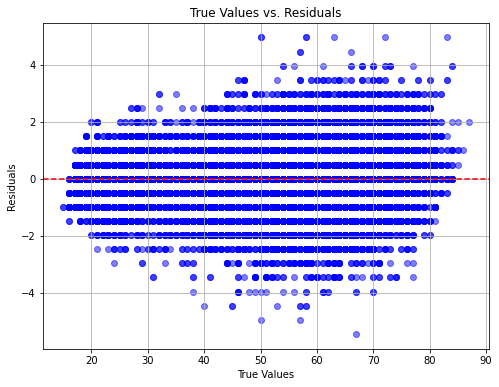

In [111]:
#Analisis residual model kelompok pertama
residuals = y_test_first.values - predict_1_dc
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_first.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

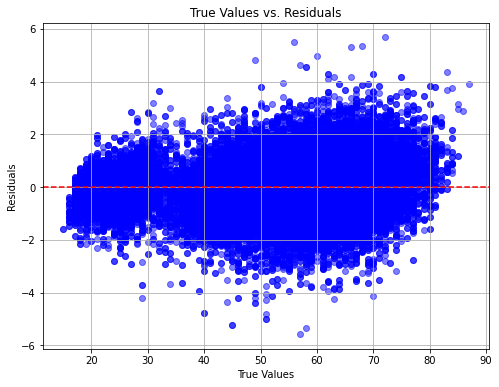

In [125]:
#Analisis residual model kelompok pertama
residuals = y_test_first.values - predict_1_rf
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_first.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Evaluasi Model Tree Regression (Decision Tree dan Random Forest) Kelompok Kedua menggunakan MAE dan RMSE

In [127]:
predict_2_dc = dc_kel_2.predict(X_test_second)
predict_2_rf = rf_kel_2.predict(X_test_second)

In [128]:
#MAE dari model kelompok kedua
mae_2_dc = mean_absolute_error(y_test_second, np.round(predict_2_dc))
mae_2_rf = mean_absolute_error(y_test_second, np.round(predict_2_rf))
print(f"Mean Absolute Error Decision Tree Kelompok Kedua: {mae_2_dc}")
print(f"Mean Absolute Error Random Forest Kelompok Kedua: {mae_2_rf}")

Mean Absolute Error Decision Tree Kelompok Kedua: 0.9812050856826976
Mean Absolute Error Random Forest Kelompok Kedua: 0.6694306246545052


In [130]:
#RMSE dari model kelompok kedua 
rmse_2_dc = mean_squared_error(y_test_second, np.round(predict_2_dc), squared=False)
rmse_2_rf = mean_squared_error(y_test_second, np.round(predict_2_rf), squared=False)
print(f"Root Mean Squared Error Decision Tree Kelompok Kedua: {rmse_2_dc}")
print(f"Root Mean Squared Error Random Forest Kelompok Kedua: {rmse_2_rf}")

Root Mean Squared Error Decision Tree Kelompok Kedua: 1.3343694150292926
Root Mean Squared Error Random Forest Kelompok Kedua: 0.9562957524965066


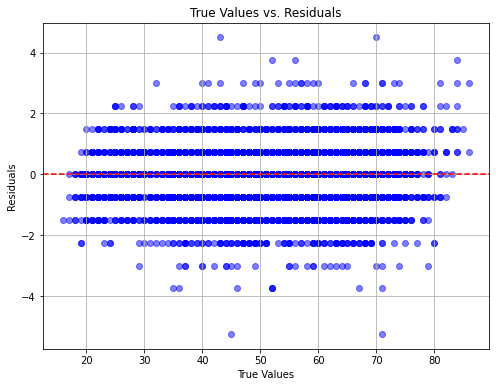

In [131]:
#Analisis residual model kelompok kedua
residuals = y_test_second.values - predict_2_dc
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_second.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

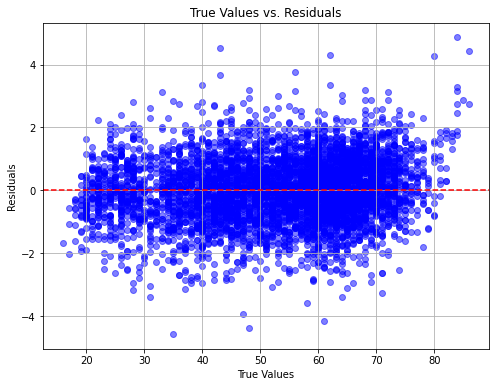

In [132]:
#Analisis residual model kelompok kedua
residuals = y_test_second.values - predict_2_rf
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_second.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Evaluasi Model Tree Regression (Decision Tree dan Random Forest) Kelompok Ketiga menggunakan MAE dan RMSE

In [50]:
predict_3_dc = dc_kel_3.predict(X_test_third)
predict_3_rf = rf_kel_3.predict(X_test_third)

In [135]:
#MAE dari model kelompok ketiga
mae_3_dc = mean_absolute_error(y_test_third, np.round(predict_3_dc))
mae_3_rf = mean_absolute_error(y_test_third, np.round(predict_3_rf))
print(f"Mean Absolute Error Decision Tree Kelompok Ketiga: {mae_3_dc}")
print(f"Mean Absolute Error Random Forest Kelompok Ketiga: {mae_3_rf}")

Mean Absolute Error Decision Tree Kelompok Ketiga: 1.8951538603279896
Mean Absolute Error Random Forest Kelompok Ketiga: 1.3967815244763837


In [51]:
#RMSE dari model kelompok ketiga 
rmse_3_dc = mean_squared_error(y_test_third, np.round(predict_3_dc), squared=False)
rmse_3_rf = mean_squared_error(y_test_third, np.round(predict_3_rf), squared=False)
print(f"Root Mean Squared Error Decision Tree Kelompok Ketiga: {rmse_3_dc}")
print(f"Root Mean Squared Error Random Forest Kelompok Ketiga: {rmse_3_rf}")

Root Mean Squared Error Decision Tree Kelompok Ketiga: 2.444684702988038
Root Mean Squared Error Random Forest Kelompok Ketiga: 1.8163781921311462


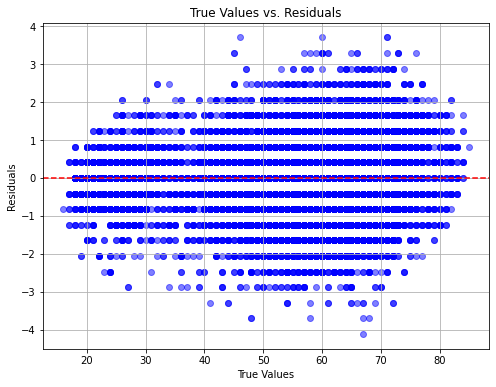

In [154]:
#Analisis residual model kelompok ketiga
residuals = y_test_third.values - predict_3_dc
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_third.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

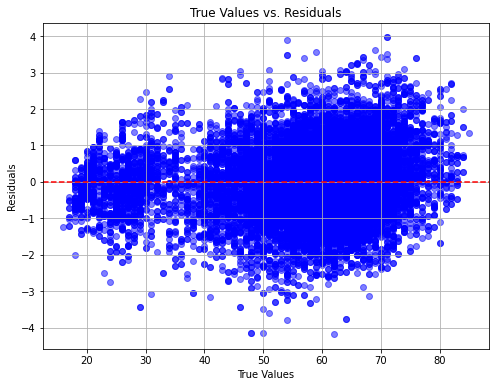

In [155]:
#Analisis residual model kelompok kedua
residuals = y_test_third.values - predict_3_rf
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_third.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Evaluasi Model Gradient Boosted Tree Regression (XGBRegressor, AdaBoost, Histogram-based Gradient Boosting Regression Tree) Kelompok Pertama menggunakan MAE dan RMSE

In [158]:
predict_1_xgb = xgb_kel_1.predict(X_test_first)
predict_1_adb = adb_kel_1.predict(X_test_first)
predict_1_hgb = hgb_kel_1.predict(X_test_first)

In [160]:
#MAE dari model kelompok pertama
mae_1_xgb = mean_absolute_error(y_test_first, np.round(predict_1_xgb))
mae_1_adb = mean_absolute_error(y_test_first, np.round(predict_1_adb))
mae_1_hgb = mean_absolute_error(y_test_first, np.round(predict_1_hgb))
print(f"Mean Absolute Error XGBoost Kelompok Pertama: {mae_1_xgb}")
print(f"Mean Absolute Error AdaBoost Kelompok Pertama: {mae_1_adb}")
print(f"Mean Absolute Error Histogram-based Gradient Boosting Regression Tree Kelompok Pertama: {mae_1_hgb}")

Mean Absolute Error XGBoost Kelompok Ketiga: 1.0699281370923162
Mean Absolute Error AdaBoost Kelompok Ketiga: 1.142827529021559
Mean Absolute Error Histogram-based Gradient Boosting Regression Tree Kelompok Ketiga: 1.0186336834346783


In [161]:
#RMSE dari model kelompok pertama 
rmse_1_xgb = mean_squared_error(y_test_first, np.round(predict_1_xgb), squared=False)
rmse_1_adb = mean_squared_error(y_test_first, np.round(predict_1_adb), squared=False)
rmse_1_hgb = mean_squared_error(y_test_first, np.round(predict_1_hgb), squared=False)
print(f"Root Mean Squared Error XGBoost Kelompok Pertama: {rmse_1_xgb}")
print(f"Root Mean Squared Error AdaBoost Kelompok Pertama: {rmse_1_adb}")
print(f"Root Mean Squared Error Histogram-based Gradient Boosting Regression Tree Kelompok Pertama: {rmse_1_hgb}")

Root Mean Squared Error XGBoost Kelompok Pertama: 1.4261755345648486
Root Mean Squared Error AdaBoost Kelompok Pertama: 1.513818428594274
Root Mean Squared Error Histogram-based Gradient Boosting Regression Tree Kelompok Pertama: 1.3668312630207957


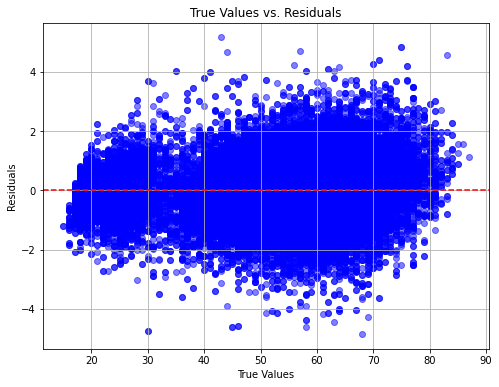

In [163]:
#Analisis residual model kelompok pertama
residuals = y_test_first.values - predict_1_xgb
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_first.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

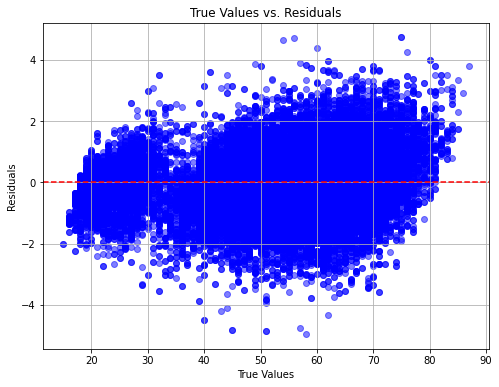

In [164]:
#Analisis residual model kelompok pertama
residuals = y_test_first.values - predict_1_adb
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_first.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

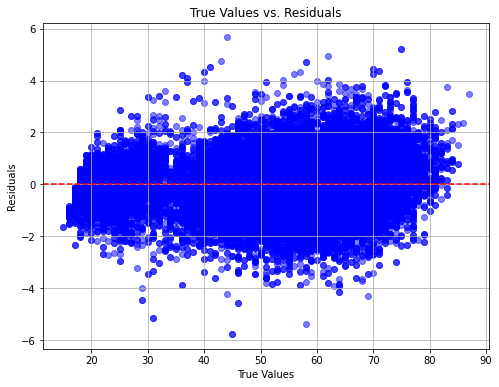

In [165]:
#Analisis residual model kelompok pertama
residuals = y_test_first.values - predict_1_hgb
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_first.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Evaluasi Model Gradient Boosted Tree Regression (XGBRegressor, AdaBoost, Histogram-based Gradient Boosting Regression Tree) Kelompok Kedua menggunakan MAE dan RMSE

In [174]:
predict_2_xgb = xgb_kel_2.predict(X_test_second)
predict_2_adb = adb_kel_2.predict(X_test_second)
predict_2_hgb = hgb_kel_2.predict(X_test_second)

In [175]:
#MAE dari model kelompok kedua
mae_2_xgb = mean_absolute_error(y_test_second, np.round(predict_2_xgb))
mae_2_adb = mean_absolute_error(y_test_second, np.round(predict_2_adb))
mae_2_hgb = mean_absolute_error(y_test_second, np.round(predict_2_hgb))
print(f"Mean Absolute Error XGBoost Kelompok Kedua: {mae_2_xgb}")
print(f"Mean Absolute Error AdaBoost Kelompok Kedua: {mae_2_adb}")
print(f"Mean Absolute Error Histogram-based Gradient Boosting Regression Tree Kelompok Kedua: {mae_2_hgb}")

Mean Absolute Error XGBoost Kelompok Kedua: 0.73042196425281
Mean Absolute Error AdaBoost Kelompok Kedua: 0.8348995761931085
Mean Absolute Error Histogram-based Gradient Boosting Regression Tree Kelompok Kedua: 0.6867514280449604


In [176]:
#RMSE dari model kelompok kedua 
rmse_2_xgb = mean_squared_error(y_test_second, np.round(predict_2_xgb), squared=False)
rmse_2_adb = mean_squared_error(y_test_second, np.round(predict_2_adb), squared=False)
rmse_2_hgb = mean_squared_error(y_test_second, np.round(predict_2_hgb), squared=False)
print(f"Root Mean Squared Error XGBoost Kelompok Kedua: {rmse_2_xgb}")
print(f"Root Mean Squared Error AdaBoost Kelompok Kedua: {rmse_2_adb}")
print(f"Root Mean Squared Error Histogram-based Gradient Boosting Regression Tree Kelompok Kedua: {rmse_2_hgb}")

Root Mean Squared Error XGBoost Kelompok Kedua: 1.0394822313916823
Root Mean Squared Error AdaBoost Kelompok Kedua: 1.1517445768470824
Root Mean Squared Error Histogram-based Gradient Boosting Regression Tree Kelompok Kedua: 0.9787685316686747


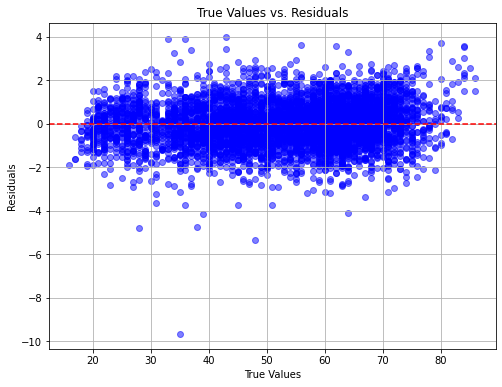

In [177]:
#Analisis residual model kelompok kedua
residuals = y_test_second.values - predict_2_xgb
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_second.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

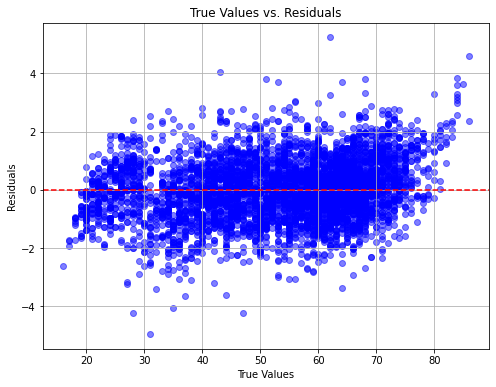

In [178]:
#Analisis residual model kelompok kedua
residuals = y_test_second.values - predict_2_adb
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_second.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

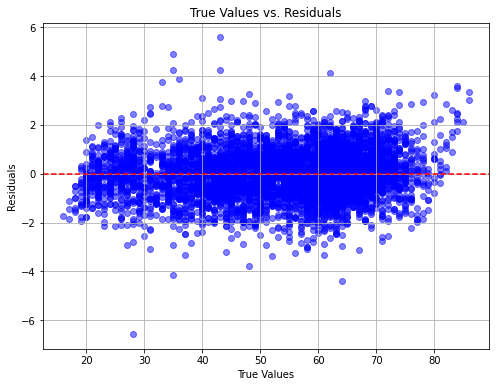

In [179]:
#Analisis residual model kelompok kedua
residuals = y_test_second.values - predict_2_hgb
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_second.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Evaluasi Model Gradient Boosted Tree Regression (XGBRegressor, AdaBoost, Histogram-based Gradient Boosting Regression Tree) Kelompok Ketiga menggunakan MAE dan RMSE

In [180]:
predict_3_xgb = xgb_kel_3.predict(X_test_third)
predict_3_adb = adb_kel_3.predict(X_test_third)
predict_3_hgb = hgb_kel_3.predict(X_test_third)

In [181]:
#MAE dari model kelompok ketiga
mae_3_xgb = mean_absolute_error(y_test_third, np.round(predict_3_xgb))
mae_3_adb = mean_absolute_error(y_test_third, np.round(predict_3_adb))
mae_3_hgb = mean_absolute_error(y_test_third, np.round(predict_3_hgb))
print(f"Mean Absolute Error XGBoost Kelompok Ketiga: {mae_3_xgb}")
print(f"Mean Absolute Error AdaBoost Kelompok Ketiga: {mae_3_adb}")
print(f"Mean Absolute Error Histogram-based Gradient Boosting Regression Tree Kelompok Ketiga: {mae_3_hgb}")

Mean Absolute Error XGBoost Kelompok Ketiga: 1.405134819728518
Mean Absolute Error AdaBoost Kelompok Ketiga: 1.4101099441066272
Mean Absolute Error Histogram-based Gradient Boosting Regression Tree Kelompok Ketiga: 1.3454333271912045


In [182]:
#RMSE dari model kelompok kedua 
rmse_3_xgb = mean_squared_error(y_test_third, np.round(predict_3_xgb), squared=False)
rmse_3_adb = mean_squared_error(y_test_third, np.round(predict_3_adb), squared=False)
rmse_3_hgb = mean_squared_error(y_test_third, np.round(predict_3_hgb), squared=False)
print(f"Root Mean Squared Error XGBoost Kelompok Ketiga: {rmse_3_xgb}")
print(f"Root Mean Squared Error AdaBoost Kelompok Ketiga: {rmse_3_adb}")
print(f"Root Mean Squared Error Histogram-based Gradient Boosting Regression Tree Kelompok Ketiga: {rmse_3_hgb}")

Root Mean Squared Error XGBoost Kelompok Ketiga: 1.8215145382239777
Root Mean Squared Error AdaBoost Kelompok Ketiga: 1.8281326059121525
Root Mean Squared Error Histogram-based Gradient Boosting Regression Tree Kelompok Ketiga: 1.7520694542363267


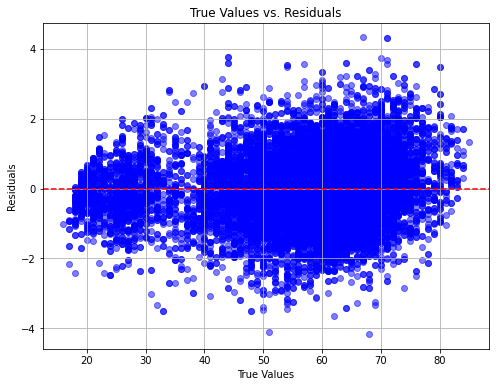

In [183]:
#Analisis residual model kelompok kedua
residuals = y_test_third.values - predict_3_xgb
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_third.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

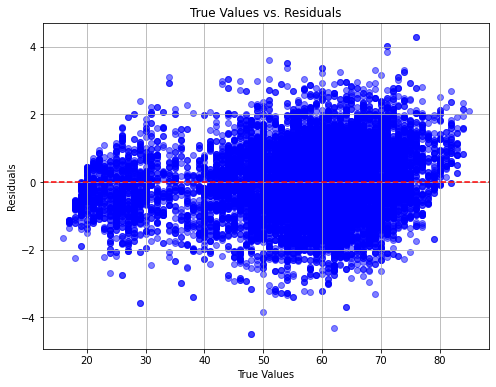

In [184]:
#Analisis residual model kelompok kedua
residuals = y_test_third.values - predict_3_adb
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_third.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

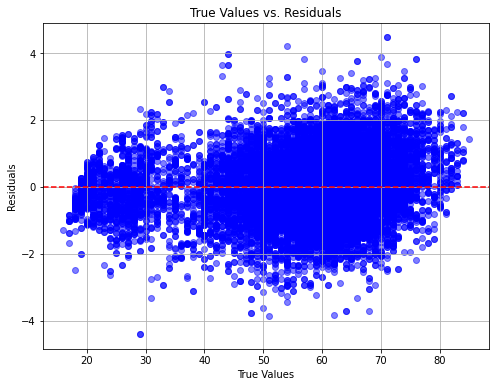

In [185]:
#Analisis residual model kelompok kedua
residuals = y_test_third.values - predict_3_hgb
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_third.values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Deployment

Deployment adalah saat dimana hasil proses analisis data disampaikan dan digunakan. Model yang sudah dibentuk kemudian di-packing untuk digunakan sebagai prediktor input.

In [186]:
#Mempacking Model yang Sudah Dilatih dan Dievaluasi dalam Format Pickle
import pickle
import os

save_directory = '../Model/'

os.makedirs(save_directory, exist_ok=True)

model_file_pertama = os.path.join(save_directory, 'model_pertama_v2.pkl')
model_file_kedua = os.path.join(save_directory, 'model_kedua_v2.pkl')
model_file_ketiga = os.path.join(save_directory, 'model_ketiga_v2.pkl')

with open(model_file_pertama, 'wb') as file:
    pickle.dump(hgb_kel_1, file)
    
with open(model_file_kedua, 'wb') as file:
    pickle.dump(hgb_kel_2, file)
    
with open(model_file_ketiga, 'wb') as file:
    pickle.dump(hgb_kel_3, file)